In [1]:
#Importing Librarires
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

In [2]:
from wordcloud import WordCloud  # importing the worldcloud module. Wordcloud uses the text sizes to represent the frequency of the text

In [3]:
wp=pd.read_csv('world-population.csv')

In [4]:
wp

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,Zimbabwe,1975,6293875,3.54 %,200914,-9109.0,15.4,7.40,16,19.3 %,1215331,0.15 %,4079480606,79
4192,Zimbabwe,1970,5289303,3.42 %,163625,-8400.0,15.6,7.40,14,17.0 %,898584,0.14 %,3700437046,79
4193,Zimbabwe,1965,4471177,3.43 %,138899,-3002.0,16.0,7.30,12,14.4 %,644767,0.13 %,3339583597,91
4194,Zimbabwe,1960,3776681,3.28 %,112679,-1501.0,17.2,7.00,10,12.5 %,472478,0.12 %,3034949748,87


In [5]:
wp.columns

Index(['country', 'Year', 'Population', 'Yearly %   Change', 'Yearly  Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban  Pop %', 'Urban Population', 'Country's Share of  World Pop',
       'World Population', 'Rank'],
      dtype='object')

In [6]:
wp.head(10)

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39
5,Afghanistan,2015,34413603,3.35 %,1045619,104354.0,17.2,5.45,53,24.3 %,8367571,0.47 %,7379797139,40
6,Afghanistan,2010,29185507,2.61 %,706246,-209272.0,15.9,6.48,45,23.4 %,6836980,0.42 %,6956823603,40
7,Afghanistan,2005,25654277,4.30 %,974865,148839.0,16.0,7.18,39,22.2 %,5691836,0.39 %,6541907027,45
8,Afghanistan,2000,20779953,2.79 %,533859,-173508.0,15.5,7.65,32,21.3 %,4436282,0.34 %,6143493823,48
9,Afghanistan,1995,18110657,7.85 %,1139670,615277.0,16.0,7.48,28,20.4 %,3697570,0.32 %,5744212979,50


In [7]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4196 non-null   object 
 1   Year                           4196 non-null   int64  
 2   Population                     4196 non-null   int64  
 3   Yearly %   Change              4196 non-null   object 
 4   Yearly  Change                 4196 non-null   int64  
 5   Migrants (net)                 3618 non-null   float64
 6   Median Age                     3618 non-null   float64
 7   Fertility Rate                 3618 non-null   float64
 8   Density (P/Km²)                4196 non-null   int64  
 9   Urban  Pop %                   4196 non-null   object 
 10  Urban Population               4196 non-null   object 
 11  Country's Share of  World Pop  4196 non-null   object 
 12  World Population               4196 non-null   i

In [8]:
wp.shape

(4196, 14)

In [9]:
wp.isnull().sum() # checking the count of the missing values in each column

country                            0
Year                               0
Population                         0
Yearly %   Change                  0
Yearly  Change                     0
Migrants (net)                   578
Median Age                       578
Fertility Rate                   578
Density (P/Km²)                    0
Urban  Pop %                       0
Urban Population                   0
Country's Share of  World Pop      0
World Population                   0
Rank                               0
dtype: int64

In [10]:
import missingno as msno

In [11]:
world=wp.iloc[:,1:]
world.shape

(4196, 13)

<Axes: >

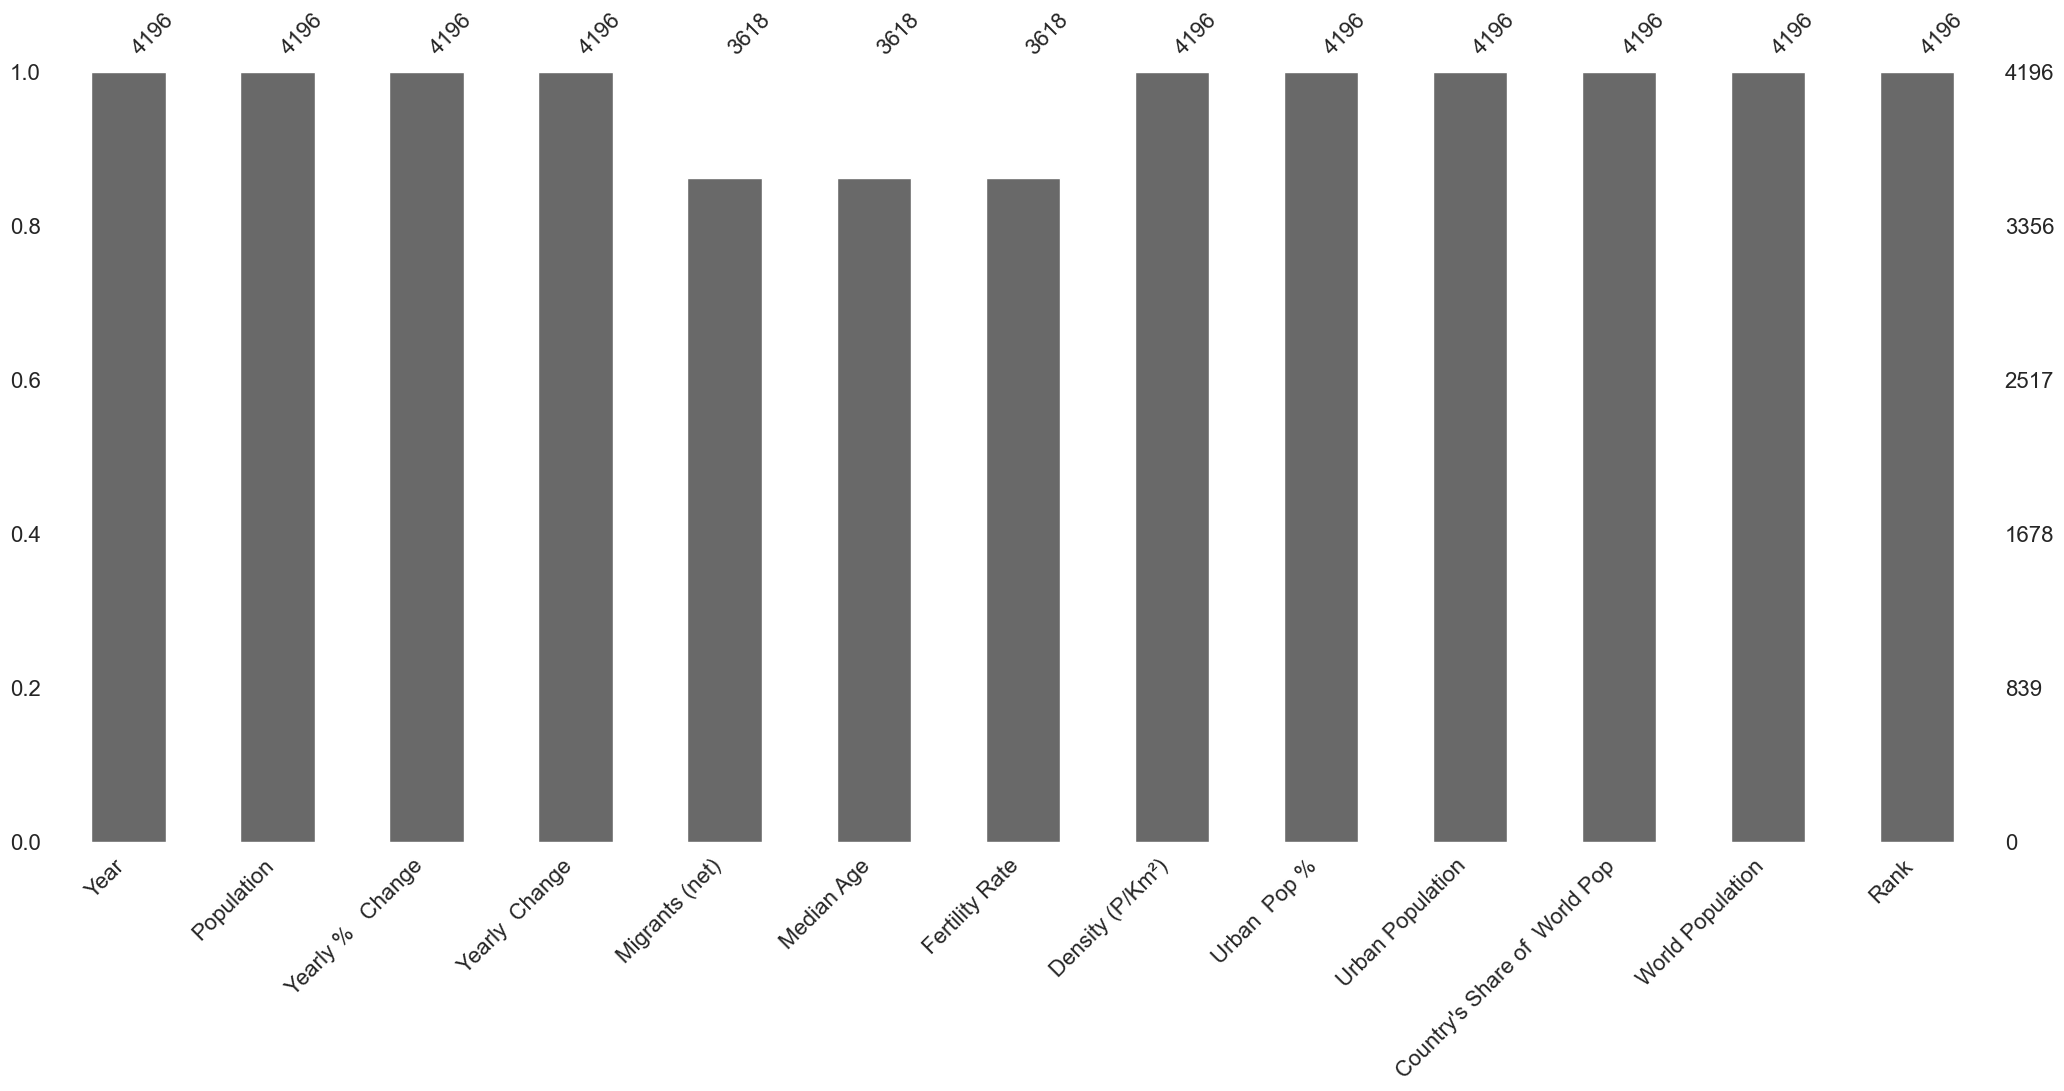

In [12]:
msno.bar(world)

<Axes: >

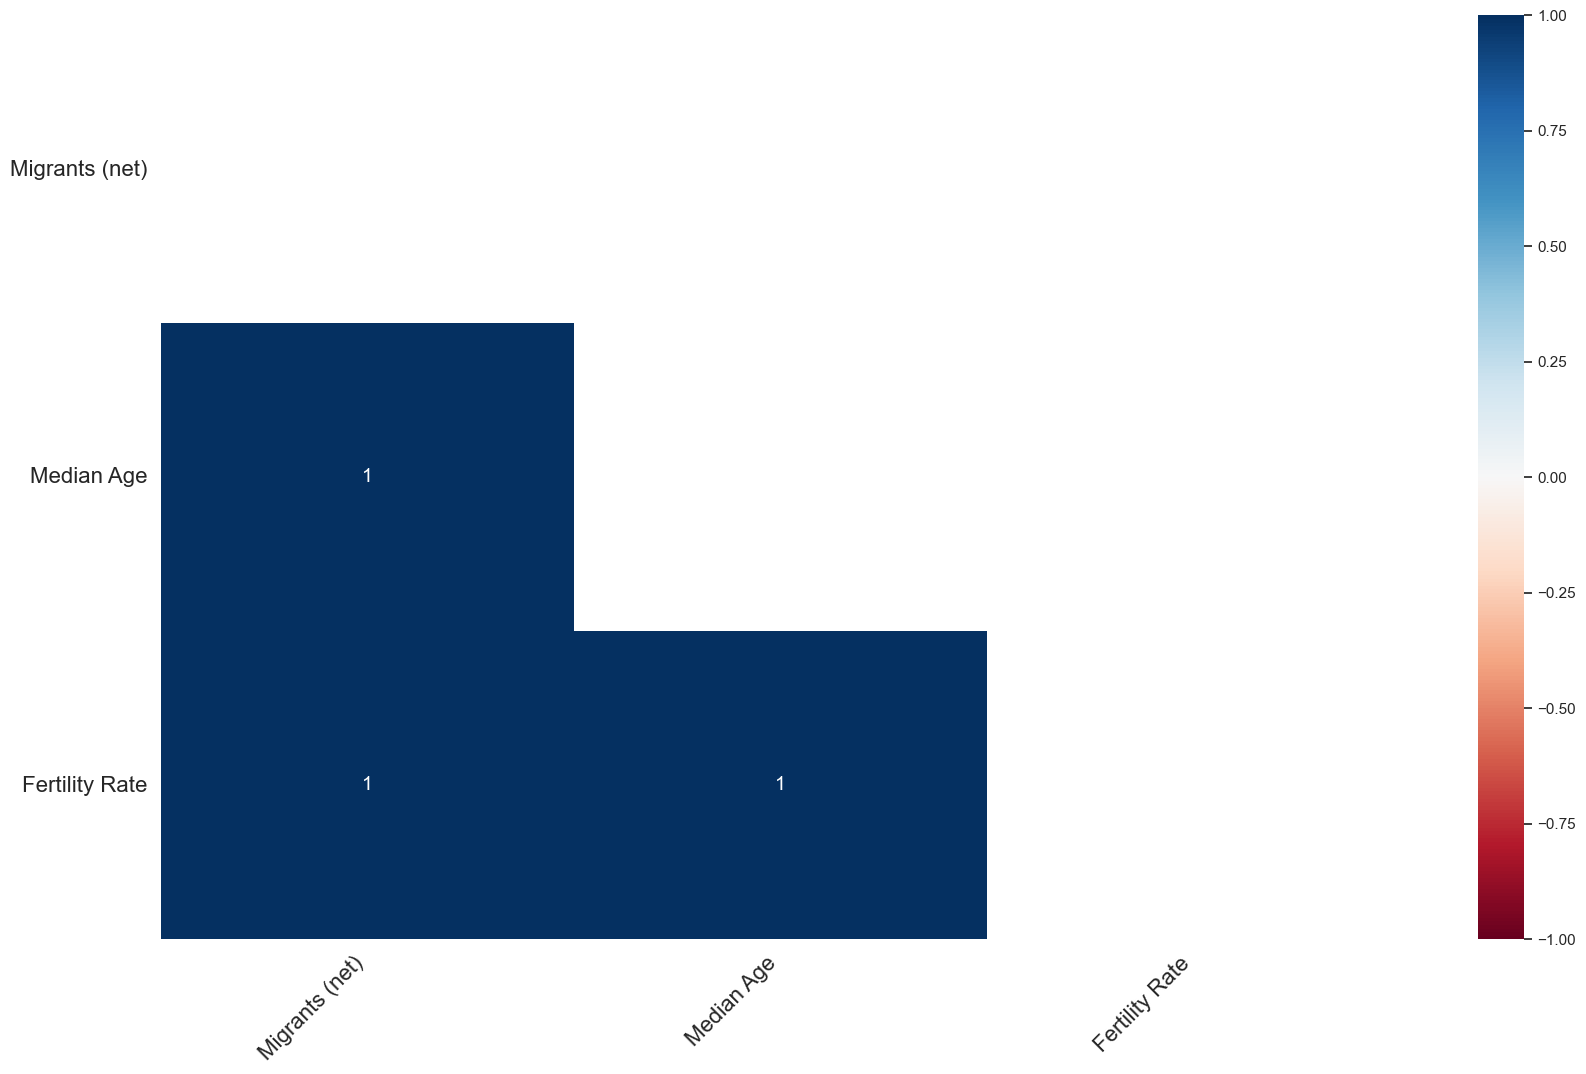

In [13]:
msno.heatmap(world)

In [14]:
wp['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
4191       Zimbabwe
4192       Zimbabwe
4193       Zimbabwe
4194       Zimbabwe
4195       Zimbabwe
Name: country, Length: 4196, dtype: object

In [15]:
from wordcloud import WordCloud 

In [16]:
wp.country.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [17]:
wp.country.value_counts()

Afghanistan       18
Norway            18
Myanmar           18
Namibia           18
Nepal             18
                  ..
San Marino        17
Cook Islands      17
Sint Maarten      17
Cayman Islands    17
Liechtenstein     17
Name: country, Length: 235, dtype: int64

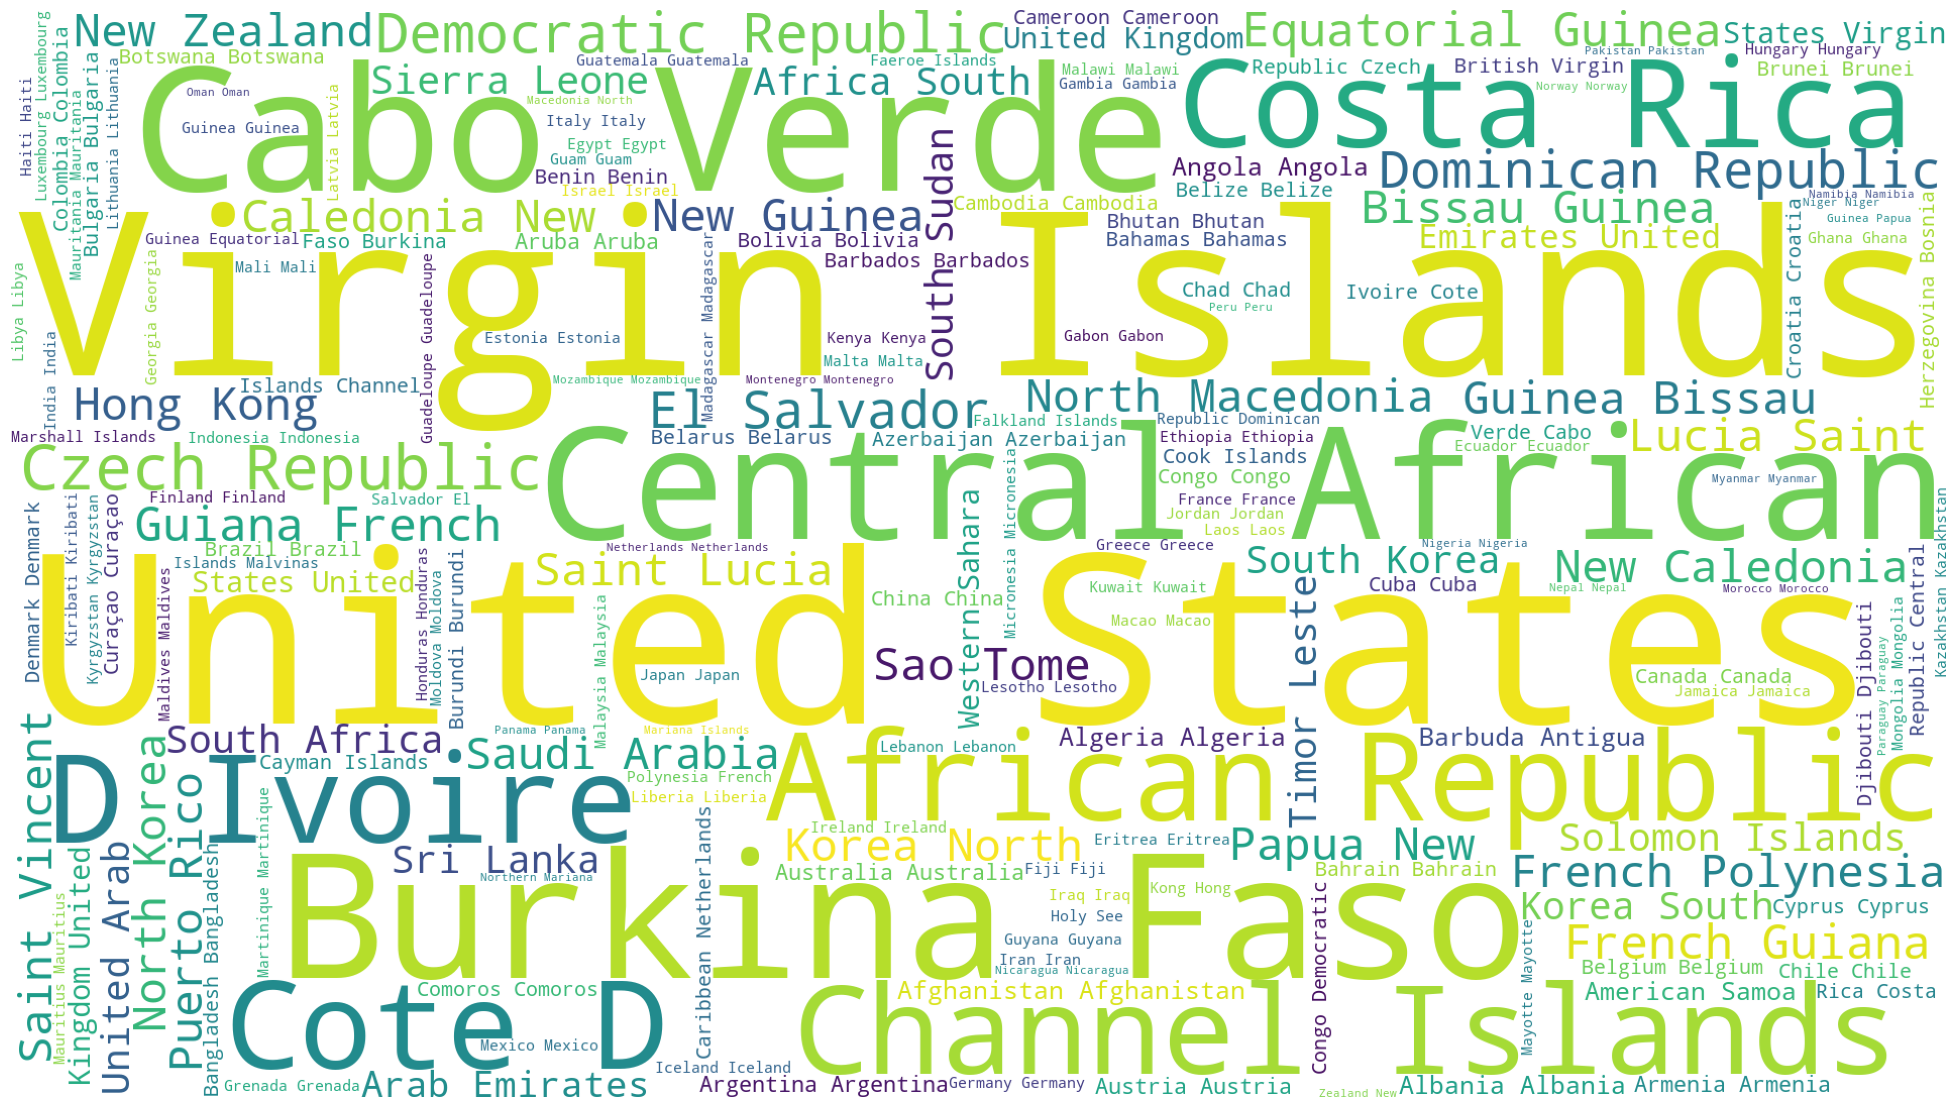

In [18]:
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(wp.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [19]:
wp.columns

Index(['country', 'Year', 'Population', 'Yearly %   Change', 'Yearly  Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban  Pop %', 'Urban Population', 'Country's Share of  World Pop',
       'World Population', 'Rank'],
      dtype='object')

In [20]:
wp.isnull().sum()

country                            0
Year                               0
Population                         0
Yearly %   Change                  0
Yearly  Change                     0
Migrants (net)                   578
Median Age                       578
Fertility Rate                   578
Density (P/Km²)                    0
Urban  Pop %                       0
Urban Population                   0
Country's Share of  World Pop      0
World Population                   0
Rank                               0
dtype: int64

In [21]:
wp['Migrants (net)'].isnull().sum()

578

In [22]:
wp['Migrants (net)'].value_counts

<bound method IndexOpsMixin.value_counts of 0      -62920.0
1      -62920.0
2      -62920.0
3      -62920.0
4      -62920.0
         ...   
4191    -9109.0
4192    -8400.0
4193    -3002.0
4194    -1501.0
4195     -901.0
Name: Migrants (net), Length: 4196, dtype: float64>

In [23]:
#Imputing the missing values for the columns Club and Position
wp['Migrants (net)'].fillna('62920.0', inplace = True)

In [24]:
wp['Migrants (net)'].isnull().sum()

0

In [25]:
to_impute_by_mean = wp.loc[:,['Median Age','Fertility Rate']]

In [26]:
to_impute_by_mean.columns

Index(['Median Age', 'Fertility Rate'], dtype='object')

In [27]:
import numpy as np

In [28]:
wp['Median Age'].mean()

25.47498618021006

In [29]:
# replacing the missing values with mean
for i in to_impute_by_mean.columns:
    wp[i].fillna(wp[i].mean(), inplace=True)

In [30]:
wp['Fertility Rate'].isnull().sum()

0

In [31]:
wp['Fertility Rate'].unique()

array([4.56      , 5.26      , 5.45      , 6.48      , 7.18      ,
       7.65      , 7.48      , 7.47      , 7.45      , 1.62      ,
       1.69      , 1.71      , 1.64      , 1.95      , 2.38      ,
       2.79      , 3.15      , 3.41      , 3.9       , 4.6       ,
       6.23      , 6.55      , 3.05      , 2.98      , 2.96      ,
       2.72      , 2.89      , 4.12      , 5.3       , 6.32      ,
       7.57      , 7.38      , 7.28      , 3.88718629, 5.55      ,
       5.91      , 6.        , 6.35      , 6.75      , 7.1       ,
       7.4       , 7.46      , 7.5       , 7.3       , 6.9       ,
       6.5       , 2.        , 2.16      , 2.2       , 2.09      ,
       2.07      , 2.14      , 2.24      , 3.26      , 4.        ,
       4.3       , 4.5       , 2.27      , 2.32      , 2.33      ,
       2.37      , 2.48      , 2.63      , 2.91      , 3.4       ,
       3.09      , 3.13      , 1.76      , 1.73      , 1.72      ,
       1.65      , 1.75      , 2.6       , 2.5       , 3.04   

In [32]:
wp.head()

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39


In [33]:
wp.loc[:,['country','Year','Population']]

,country,Year,Population
0,Afghanistan,2020,38928346
1,Afghanistan,2019,38041754
2,Afghanistan,2018,37171921
3,Afghanistan,2017,36296113
4,Afghanistan,2016,35383032
...,...,...,...
4191,Zimbabwe,1975,6293875
4192,Zimbabwe,1970,5289303
4193,Zimbabwe,1965,4471177
4194,Zimbabwe,1960,3776681


In [34]:
wp['country'].head(50)

0     Afghanistan
1     Afghanistan
2     Afghanistan
3     Afghanistan
4     Afghanistan
5     Afghanistan
6     Afghanistan
7     Afghanistan
8     Afghanistan
9     Afghanistan
10    Afghanistan
11    Afghanistan
12    Afghanistan
13    Afghanistan
14    Afghanistan
15    Afghanistan
16    Afghanistan
17    Afghanistan
18        Albania
19        Albania
20        Albania
21        Albania
22        Albania
23        Albania
24        Albania
25        Albania
26        Albania
27        Albania
28        Albania
29        Albania
30        Albania
31        Albania
32        Albania
33        Albania
34        Albania
35        Albania
36        Algeria
37        Algeria
38        Algeria
39        Algeria
40        Algeria
41        Algeria
42        Algeria
43        Algeria
44        Algeria
45        Algeria
46        Algeria
47        Algeria
48        Algeria
49        Algeria
Name: country, dtype: object

In [35]:
# functions to get the rounded values from different columns
def Afghanistan(data):
    return int(round((data[['Year', 'Population', 
                               ]].mean()).mean()))

def Zimbabwe(data):
    return int(round((data[['Year', 'Population', 
                               ]].mean()).mean()))

def Albania(data):
    return int(round((data[['Year', 'Population', 
                               ]].mean()).mean()))

def Algeria(data):
    return int(round((data[['Year', 'Population', 
                              ]].mean()).mean()))

In [36]:
wp['Afghanistan']=wp.apply(Afghanistan, axis=1)
wp['Zimbabwe']=wp.apply(Zimbabwe, axis=1)
wp['Albania']=wp.apply(Albania, axis=1)
wp['Algeria']=wp.apply(Algeria, axis=1)

In [37]:
wp.loc[:,'Afghanistan']

0       19465183
1       19021886
2       18586970
3       18149065
4       17692524
          ...   
4191     3147925
4192     2645636
4193     2236571
4194     1889320
4195     1607620
Name: Afghanistan, Length: 4196, dtype: int64

In [38]:
wp.head(20)

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank,Afghanistan,Zimbabwe,Albania,Algeria
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37,19465183,19465183,19465183,19465183
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37,19021886,19021886,19021886,19021886
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38,18586970,18586970,18586970,18586970
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39,18149065,18149065,18149065,18149065
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39,17692524,17692524,17692524,17692524
5,Afghanistan,2015,34413603,3.35 %,1045619,104354.0,17.2,5.45,53,24.3 %,8367571,0.47 %,7379797139,40,17207809,17207809,17207809,17207809
6,Afghanistan,2010,29185507,2.61 %,706246,-209272.0,15.9,6.48,45,23.4 %,6836980,0.42 %,6956823603,40,14593758,14593758,14593758,14593758
7,Afghanistan,2005,25654277,4.30 %,974865,148839.0,16.0,7.18,39,22.2 %,5691836,0.39 %,6541907027,45,12828141,12828141,12828141,12828141
8,Afghanistan,2000,20779953,2.79 %,533859,-173508.0,15.5,7.65,32,21.3 %,4436282,0.34 %,6143493823,48,10390976,10390976,10390976,10390976
9,Afghanistan,1995,18110657,7.85 %,1139670,615277.0,16.0,7.48,28,20.4 %,3697570,0.32 %,5744212979,50,9056326,9056326,9056326,9056326


In [39]:
country_population=wp[['country','Year','Population']]
country_population.head(20)

,country,Year,Population
0,Afghanistan,2020,38928346
1,Afghanistan,2019,38041754
2,Afghanistan,2018,37171921
3,Afghanistan,2017,36296113
4,Afghanistan,2016,35383032
5,Afghanistan,2015,34413603
6,Afghanistan,2010,29185507
7,Afghanistan,2005,25654277
8,Afghanistan,2000,20779953
9,Afghanistan,1995,18110657


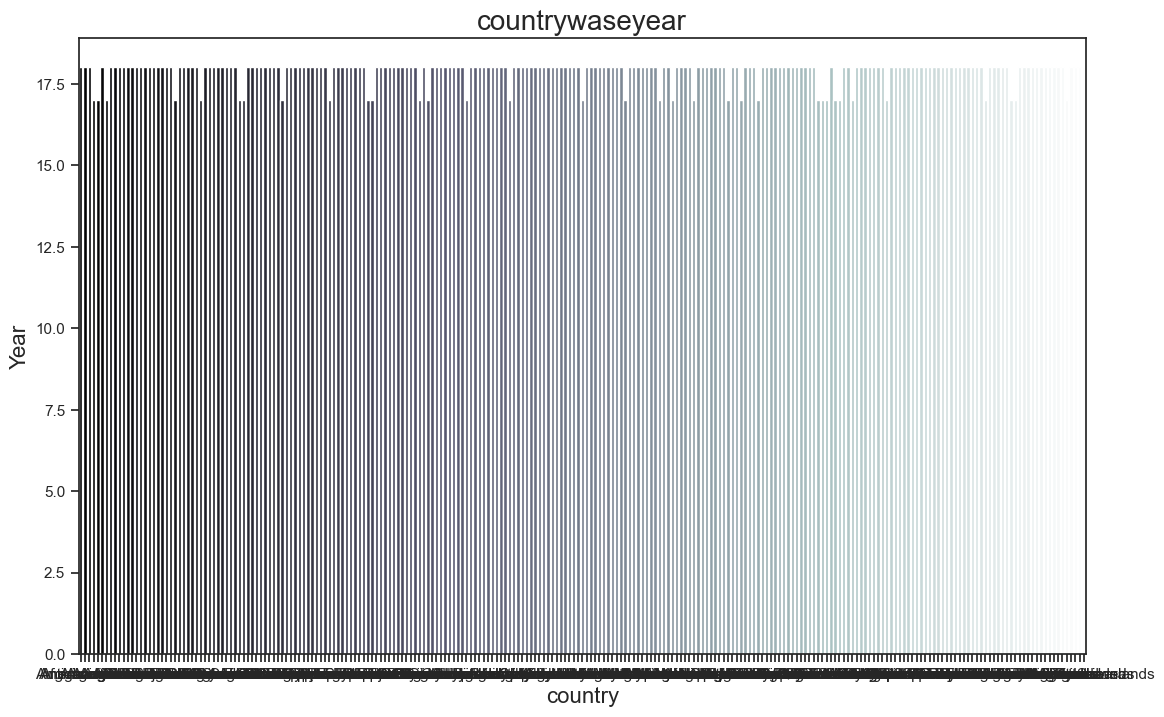

In [40]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'country', data = wp, palette = 'bone')
ax.set_title(label = 'countrywaseyear', fontsize = 20)
ax.set_xlabel(xlabel = 'country', fontsize = 16)
ax.set_ylabel(ylabel = 'Year', fontsize = 16)
plt.show()


In [44]:
countrybase=wp[wp['country']=='Albania']

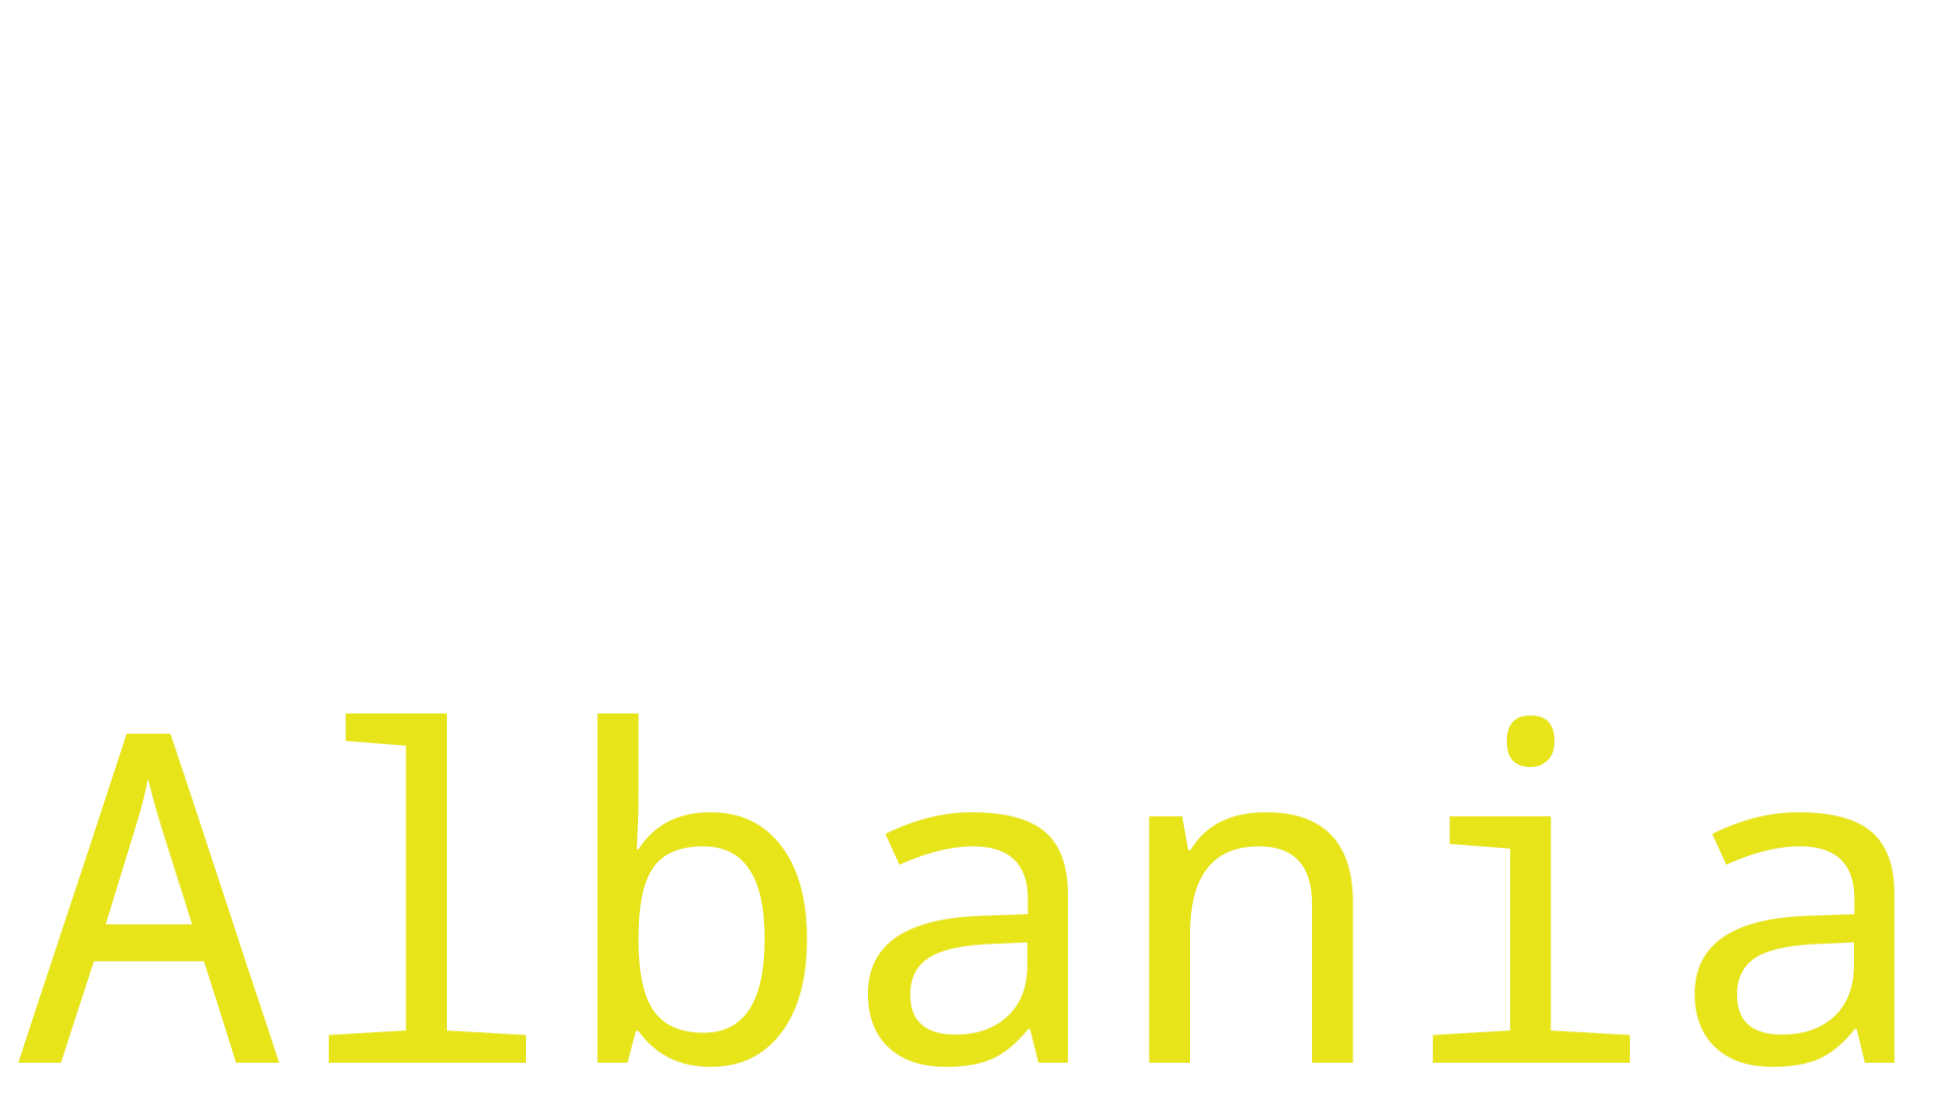

In [45]:
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(countrybase['country']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()